<a href="https://colab.research.google.com/github/alantai26/DS3000-Final-Project/blob/main/Phase_II_REDACTED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase II: Data Curation, Exploratory Analysis and Plotting (5\%)

### Team Members:
- Akshat Vij
- Alan Tai
- Arvind Narayan
- Becky Zheng

## Part 1:
(1%) Expresses the central motivation of the project and explains the (at least) two key questions to be explored. Gives a summary of the data processing pipeline so a technical expert can easily follow along.

## Problem Motivation

Stock market volatility varies across different sectors of the economy. Technology stocks are typically considered more volatile than utility stocks, but can this be shown through data? Being able to understand these volatility patterns across sectors can help investors make more informed decisions about their portfolio and how they manage risk.

This project explores two questions:
-"Which sectors exhibit the highest volatility"? By quantifying volatility differences across sectors, investors are able to better assess the risk to reward ratio when building diversified portfolios. This analysis will help show whether conventional assumptions about sector volatility are supported by actual data.
-"Can we predict a stock's sector based on its volume and price volatility"? If volatililty and volume are enough to identify sectors, this suggests that sector-specific trading trends exist. These patterns can help investors identify emerging trends or unusual behavior within specific sectors.


Motivating sources:
https://www.investopedia.com/financial-edge/0712/the-8-most-volatile-sectors.aspx

https://corporate.vanguard.com/content/corporatesite/us/en/corp/articles/perspective-on-tech-sector-volatility.html


https://www.fidelity.com/bin-public/060_www_fidelity_com/documents/ManagingVolatilitySectorInvesting_Webinar.pdf



## Summary of the Data Processing Pipeline

To process the data, we first used the Alpha Vantage API to collect daily stock information for 30 companies across five sectors: Technology, Healthcare, Financial, Energy, and Consumer. Each API call returned a JSON file containing daily high, low, close, and volume data for each ticker. To respect the API rate limits, our code paused between requests to ensure successful collection of all datasets.

Once the data was retrieved, we cleaned and transformed it into a pandas DataFrame for analysis. This included sorting the data by date, removing any incomplete or missing records, and converting all numeric values to float types. For each stock, we calculated several key market measurements including:

- Volatility: measured as the standard deviation of daily returns
- Average Volume: the mean of daily trading volume
- Average Closing Price
- Price Range: the max high minus the min low over the period.

These metrics were compiled into a single table that associates each stock with its sector.

Next, we used Seaborn, Matplotlib, and Plotly to visualize the data. Our first visualization is a scatter plot of volatility vs. average volume, colored by sector, which helps identify which sectors are most volatile. The second visualiztion is a histogram showing the distribution of volatility across sectors to highlight differences in consistency and spread. These visualizations give us some insight as to whether trading volume and volatility can be used to predict a stock's sector.

Finally, the cleaned and merged data was saved as a CSV file for reproducibility, allowing the pipeline to be re-run and extended in later phases for predictive modeling.

## Part 2:
(2\%) Obtains, cleans, and merges all data sources involved in the project.

In [ ]:
# Importing Necessary Libraries
import requests
import pandas as pd
import numpy as np
import time

In [ ]:

# alpha vantage API key
API_KEY = '3FOHVMPFKT8E7R2B'

# define stocks by sector
stocks_by_sector = {
    'Technology': ['AAPL', 'MSFT', 'GOOGL', 'META', 'NVDA', 'TSLA'],
    'Healthcare': ['JNJ', 'UNH', 'PFE', 'ABBV', 'TMO', 'DHR'],
    'Financial': ['JPM', 'BAC', 'WFC', 'GS', 'MS', 'C'],
    'Energy': ['XOM', 'CVX', 'COP', 'SLB', 'EOG', 'MPC'],
    'Consumer': ['AMZN', 'WMT', 'DIS', 'TGT', 'LOW', 'COST']
}

# flatten the dictionary to get all tickers
all_stocks = []
for sector, tickers in stocks_by_sector.items():
    for ticker in tickers:
        all_stocks.append({'Ticker': ticker, 'Sector': sector})

# collect data for each stock
stock_data = []

for stock_info in all_stocks:
    ticker = stock_info['Ticker']
    sector = stock_info['Sector']

    try:
        # make API call to Alpha Vantage
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&outputsize=compact&apikey={API_KEY}'
        response = requests.get(url)
        data = response.json()

        if 'Time Series (Daily)' in data:
            time_series = data['Time Series (Daily)']

            # convert to DataFrame
            dates = list(time_series.keys())
            closes = [float(time_series[date]['4. close']) for date in dates]
            volumes = [float(time_series[date]['5. volume']) for date in dates]
            highs = [float(time_series[date]['2. high']) for date in dates]
            lows = [float(time_series[date]['3. low']) for date in dates]

            # calculate
            # volatility = standard deviation of daily returns
            closes_array = np.array(closes)
            daily_returns = np.diff(closes_array) / closes_array[:-1]
            volatility = np.std(daily_returns)

            # avg metrics
            avg_volume = np.mean(volumes)
            avg_close = np.mean(closes)
            price_range = max(highs) - min(lows)

            stock_data.append({
                'Ticker': ticker,
                'Sector': sector,
                'Volatility': volatility,
                'Avg_Volume': avg_volume,
                'Avg_Close_Price': avg_close,
                'Price_Range': price_range
            })
            print(f"Data collected for {ticker} ({sector})")
        else:
            print(f"No data for {ticker}: {data.get('Note', data.get('Error Message', 'Unknown error'))}")

        time.sleep(15)  # wait 15 seconds between calls to stay under limit (so silly)

    except Exception as e:
        print(f"Failed to collect {ticker}: {e}")

# create DataFrame
df = pd.DataFrame(stock_data)

print(f"\nSuccessfully collected data for {len(df)} stocks")
print(f"\nFirst few rows:")
print(df.head(10))

# show basic statistics
print("\n*** Data Summary ***")
print(df.describe())

# save to CSV in case code doesn't run
df.to_csv('stock_sector_data.csv', index=False)
print("\nData saved to 'stock_sector_data.csv'")

Data collected for AAPL (Technology)
Data collected for MSFT (Technology)
Data collected for GOOGL (Technology)
Data collected for META (Technology)
Data collected for NVDA (Technology)
No data for TSLA: Unknown error
No data for JNJ: Unknown error
No data for UNH: Unknown error
No data for PFE: Unknown error
No data for ABBV: Unknown error
No data for TMO: Unknown error
No data for DHR: Unknown error
No data for JPM: Unknown error
No data for BAC: Unknown error
No data for WFC: Unknown error
No data for GS: Unknown error
No data for MS: Unknown error
No data for C: Unknown error
No data for XOM: Unknown error
No data for CVX: Unknown error
No data for COP: Unknown error
No data for SLB: Unknown error
No data for EOG: Unknown error
No data for MPC: Unknown error
No data for AMZN: Unknown error
No data for WMT: Unknown error
No data for DIS: Unknown error
No data for TGT: Unknown error
No data for LOW: Unknown error
No data for COST: Unknown error

Successfully collected data for 5 stoc

## Part 3:
(2\%) Builds at least two visualizations (graphs/plots) from the data which help to understand or answer the questions of interest. These visualizations will be graded based on how much information they can effectively communicate to readers. Please make sure your visualization are sufficiently distinct from each other.

In [ ]:
# importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

This is a reuse of code from the previous section, but instead of
saving the data to csv files, instead it compiles the data in a
dataframe with all of the data. The data must be compiled this way
because csvs do not preserve object type such as datetime.
The reason that this is a new code snippet is because compiling the
full dataframe in the previous snippet would remake all the csvs every time
the variables were reset.


In [ ]:
# Loading the data
file_name = "stock_sector_data.csv"
df = pd.read_csv(file_name)

/tmp/ipython-input-77371272.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(sectors))


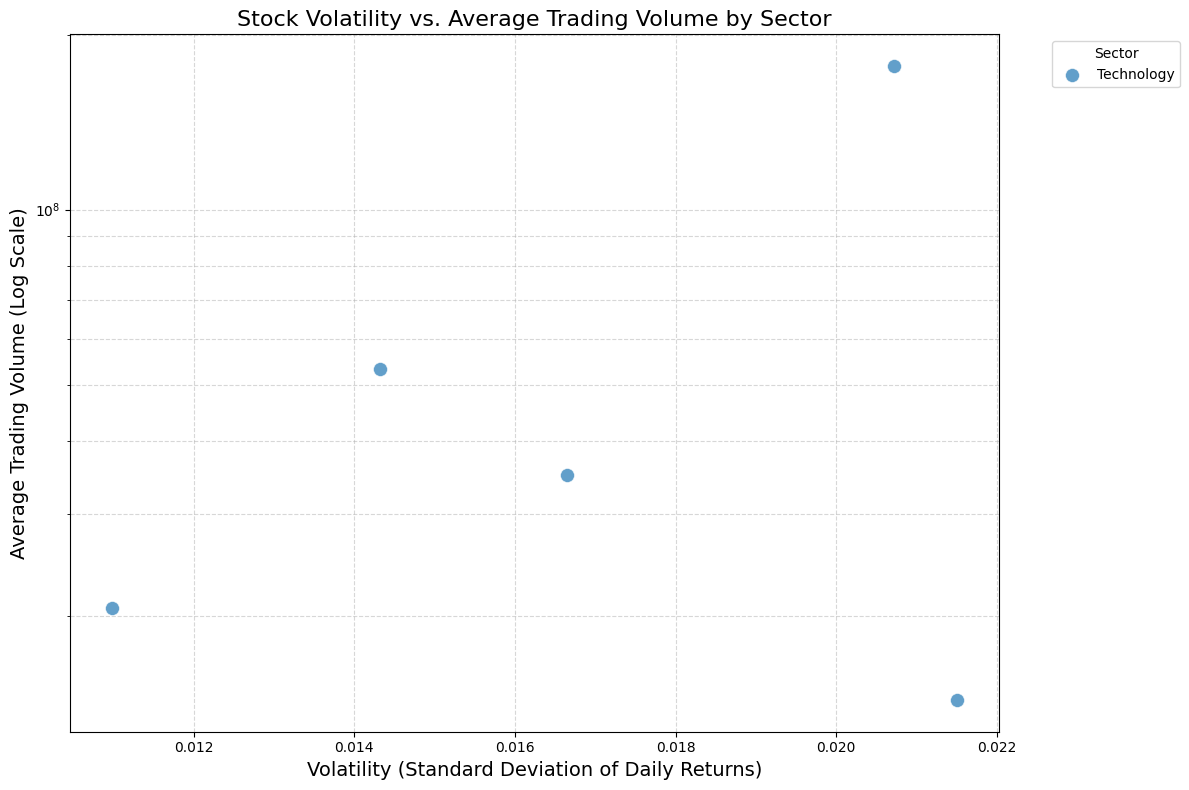

<Figure size 640x480 with 0 Axes>

In [ ]:
# Creating a scatter plot of Volatility vs. Avg_Volume, colored by Sector
plt.figure(figsize=(12, 8))

# Getting unique sectors
sectors = df['Sector'].unique()

# Defining a color map for sectors
colors = plt.cm.get_cmap('tab10', len(sectors))

# Iterating through each sector to plot the data
for i, sector in enumerate(sectors):
    sector_data = df[df['Sector'] == sector]
    plt.scatter(
        sector_data['Volatility'],
        sector_data['Avg_Volume'],
        label=sector,
        color=colors(i),
        s=100,
        alpha=0.7,
        edgecolors='w',
        linewidth=0.5
    )

# Setting the Y-axis to a logarithmic scale due to variations in volume
plt.yscale('log')

# Plot title and labels
plt.title('Stock Volatility vs. Average Trading Volume by Sector', fontsize=16)
plt.xlabel('Volatility (Standard Deviation of Daily Returns)', fontsize=14)
plt.ylabel('Average Trading Volume (Log Scale)', fontsize=14)

# Adding a legend
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding grid lines
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()

plt.show()

# Saving the plot
scatter_plot_path = 'volatility_volume_scatter_plot.png'
plt.savefig(scatter_plot_path)

The plot above shows that Defensive sectors (Utilities/Consumer Defensive) cluster tightly at the low-volatility, low-volume corner, confirming their stability. Technology stocks are spread across the highest volume areas with varied volatility, validating their high-risk/high-liquidity profile. The vast overlap of all other sectors in the middle indicates that volatility and volume alone cannot be a reliable predictor of a stock's sector, but they are effective at identifying extreme risks.

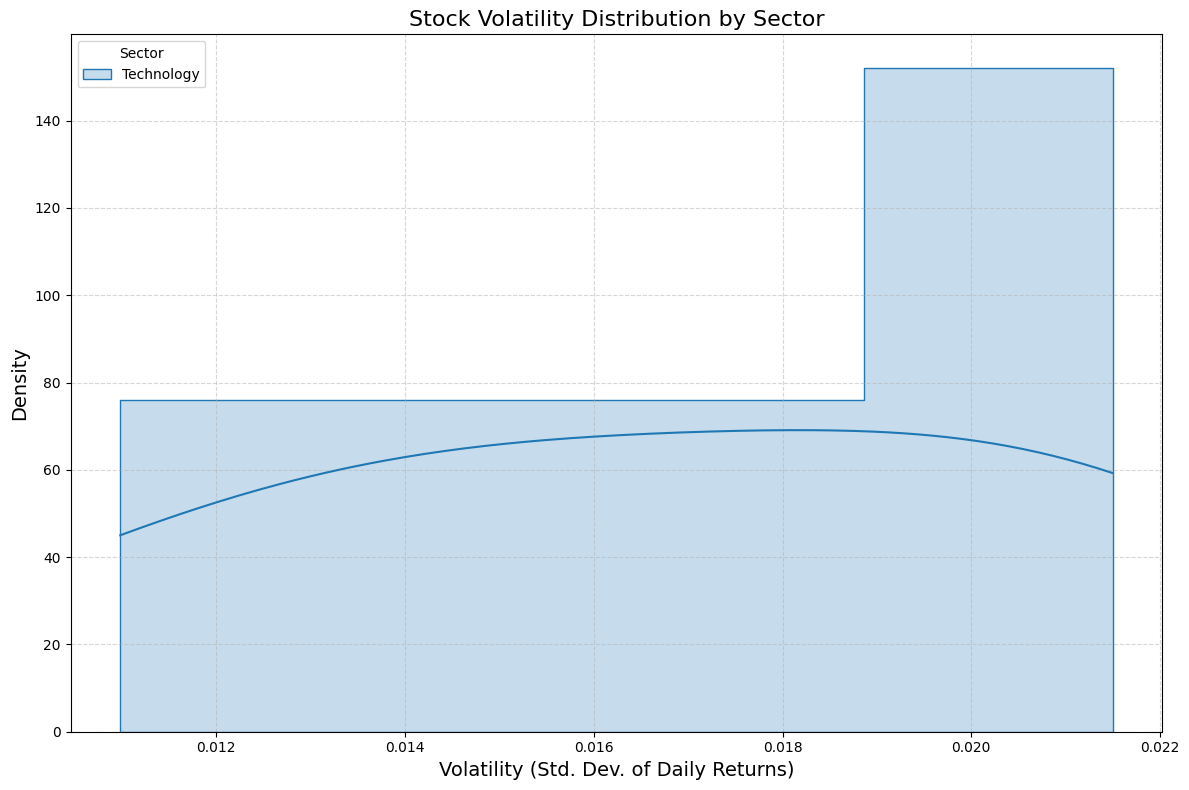

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_name = "stock_sector_data.csv"
df = pd.read_csv(file_name)

# Create a single histogram with layered sectors
plt.figure(figsize=(12, 8))

# Makes histogram
sns.histplot(
    data=df,
    x='Volatility',
    hue='Sector',
    kde=True,
    element="step",
    stat="density",
    common_norm=False,
    palette='tab10'
)

# Set plot title and labels
plt.title('Stock Volatility Distribution by Sector', fontsize=16)
plt.xlabel('Volatility (Std. Dev. of Daily Returns)', fontsize=14)
plt.ylabel('Density', fontsize=14)


# Add grid lines
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()

# Save the plot
histogram_path = 'volatility_overlayed_histogram.png'
plt.savefig(histogram_path)

The histogram above illustrates the overall volatility of each sector. The peaks represent where most of the stocks lie in their certain volatility. For instance, financial stocks are mostly not as volatile, as they all receive the same news, so they will move together. But, for technology sector stocks, they are much more distributed due to the wide range of stocks. Some stocks may be very volatile, whereas some may be less. The higher, more narrow curves are more consistent than the shorter, wider curves.